In [ ]:
import pandas as pd
import numpy as np
import csv  # Optional, not used in this code snippet
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')  # Download stopwords once
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  # Use StratifiedKFold for imbalanced datasets
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

# Replace with the correct path to your CSV file
data_path = "/content/amazon_alexa.tsv"  # Absolute path or relative path if in the same directory

# Load your data using the absolute or relative path
data = pd.read_csv(data_path, delimiter='\t')  # Use '\t' for tab-separated values

# Separate features (text) and target variable (category)
# ... (Your code for data cleaning and processing continues here)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.4 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/amazon_alexa.tsv', delimiter='\t')  # Explicitly specify the delimiter as tab

In [ ]:
print(df)

                         id  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
34655  AVpfiBlyLJeJML43-4Tp   
34656  AVpfiBlyLJeJML43-4Tp   
34657  AVpfiBlyLJeJML43-4Tp   
34658  AVpfiBlyLJeJML43-4Tp   
34659  AVpfiBlyLJeJML43-4Tp   

                                                    name       asins   brand  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
...                                                  ...         ...     ...   
34655                                                NaN  B006GWO5W

In [ ]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [ ]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:

# Corrected code: Use 'delimiter' instead of 'delimite'
import pandas as pd
df = pd.read_csv('/content/amazon_alexa.tsv', delimiter='\t', quoting=3) # Verify the correct file path

print("df shape:", df.shape)  # Use f-string for cleaner output

df shape: (3150, 5)


In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
print(f"feature names : {data.columns.values}")

feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [ ]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [ ]:
try:
  # Filter for missing values, handling potential KeyError
  filtered_data = data[data['rating_review'].isna() == True]
  print(filtered_data)
except KeyError:
  print("Column 'rating_review' not found in the DataFrame.")


Column 'rating_review' not found in the DataFrame.


In [ ]:
data.dropna(inplace=True)

In [ ]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [ ]:
if 'total_vote' in data.columns:
  # No need to apply len() to integer column
  data['length'] = data['total_vote']  # Just assign the values
else:
  print("Column 'total_vote' not found in the DataFrame. 'length' not created.")


In [ ]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [ ]:
len(data)

3150

In [ ]:
if 'rating' in data.columns:
  # Print rating value counts if the column exists
  print(f"rating value count: \n{data['rating'].value_counts()}")

  # Print all votes in the 'vote' column
  print("\nAll votes:")
  print(data['rating'])


rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

All votes:
0       5
1       5
2       4
3       5
4       5
       ..
3145    5
3146    5
3147    5
3148    5
3149    4
Name: rating, Length: 3149, dtype: int64


In [ ]:
if '' in data.columns:
  print("First 5 rating:")
  print(data['rating'].head())


In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
try:
    rating_counts = data['rating'].value_counts()
    rating_counts.plot.bar(color='red')
    plt.title('Rating distribution count')
    plt.xlabel('Ratings')
    plt.ylabel('Count')
    plt.show()
except KeyError:
    print("Column 'rating' not found in the DataFrame.")

Column 'rating' not found in the DataFrame.


In [ ]:
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


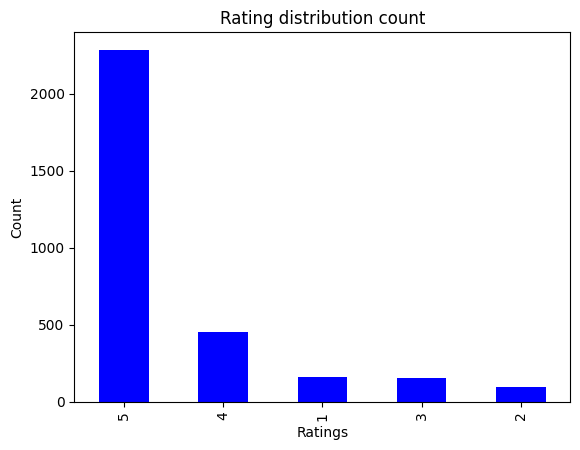

In [ ]:
data['rating'].value_counts().plot.bar(color = 'blue')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


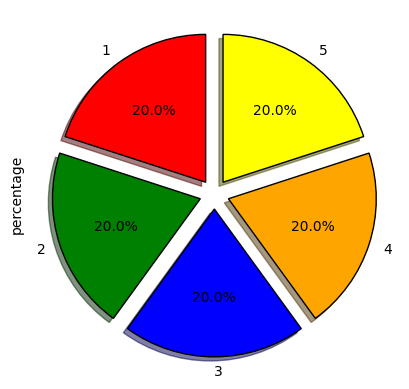

In [ ]:
import matplotlib.pyplot as plt  # Import Matplotlib
from io import BytesIO
import pandas as pd # Import pandas library

# Sample data, replace this with your actual data loading
data = pd.DataFrame({'rating': [1, 2, 3, 4, 5, 5, 4, 3, 2, 1]})

color = ('red', 'green', 'blue', 'orange', 'yellow')  # Fix missing quote
wp = {'linewidth': 1, "edgecolor": 'black'}
# Assuming 'data' is your DataFrame
tags = data['rating'].value_counts() / data.shape[0]
explode = [0.1, 0.1, 0.1, 0.1, 0.1]  # Fix explode values

# Create the plot
fig, ax = plt.subplots()  # Create a figure and axes
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True,
          colors=color, startangle=90, wedgeprops=wp,
          explode=explode, label='percentage', ax=ax)  # Plot on the axes

# Save the figure to BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")


In [ ]:
print (f"feedback value count: \n{data['feedback'].value_counts()}")


feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [ ]:
review_0 =data[data['feedback'] ==0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [ ]:
review_1 =data[data['feedback'] ==0].iloc[1]['verified_reviews']
print(review_1)

Sound is terrible if u want good music too get a bose


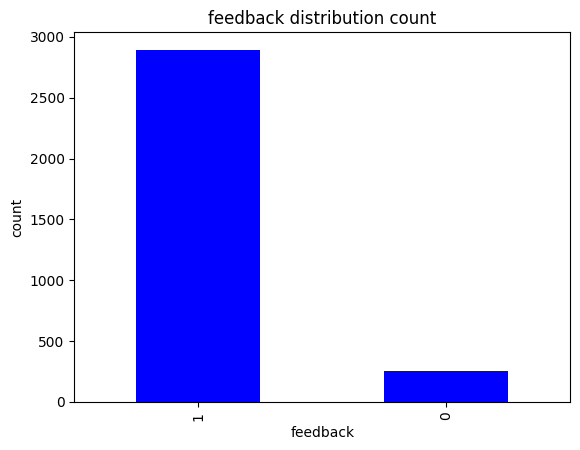

In [ ]:
data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('feedback distribution count')
plt.xlabel('feedback')
plt.ylabel('count')
plt.show()

In [ ]:
print(f"Feedback value count = percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count = percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


In [ ]:
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [ ]:
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [ ]:
print(f"variation value count: \n{data['rating'].value_counts()}")

variation value count: 
rating
1    2
2    2
3    2
4    2
5    2
Name: count, dtype: int64


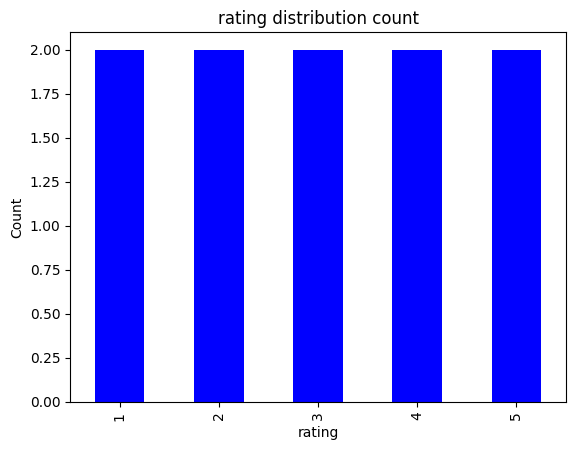

In [ ]:
data['rating'].value_counts().plot.bar(color = 'blue')
plt.title('rating distribution count')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

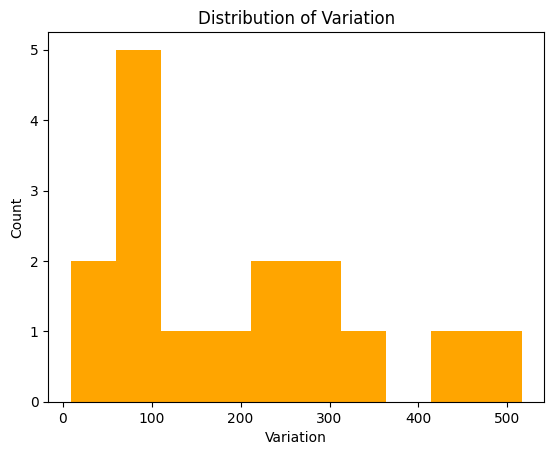

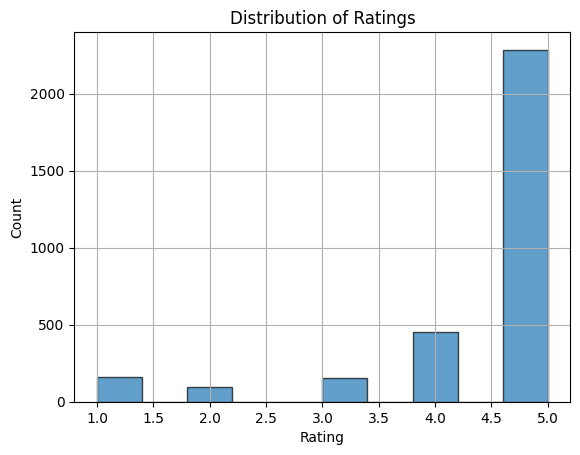

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the TSV file
data = pd.read_csv("/content/amazon_alexa.tsv", sep="\t")

# Check if 'variation' column exists
if 'variation' in data.columns:

  # Distribution of variation using histogram
  data['variation'].value_counts().plot(kind='hist', color='orange')
  plt.title('Distribution of Variation')
  plt.xlabel('Variation')
  plt.ylabel('Count')
  plt.show()

  # Check if 'rating' column exists for comparison
  if 'rating' in data.columns:
    # Create a new figure to avoid overlapping plots
    plt.figure()  # Clear the previous plot

    # Histogram of rating with customization options
    plt.hist(data['rating'], bins=10, edgecolor='black', alpha=0.7)  # Adjust bins and appearance

    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.grid(True)  # Add grid for better readability (optional)
    plt.show()
  else:
    print("'rating' column not found for comparison.")

else:
  print("'variation' column not found in the dataset.")


In [ ]:
dataset_length = len(data.columns)

print(f"The dataset has {dataset_length} columns (features).")


The dataset has 5 columns (features).


In [ ]:
print(data)

      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                

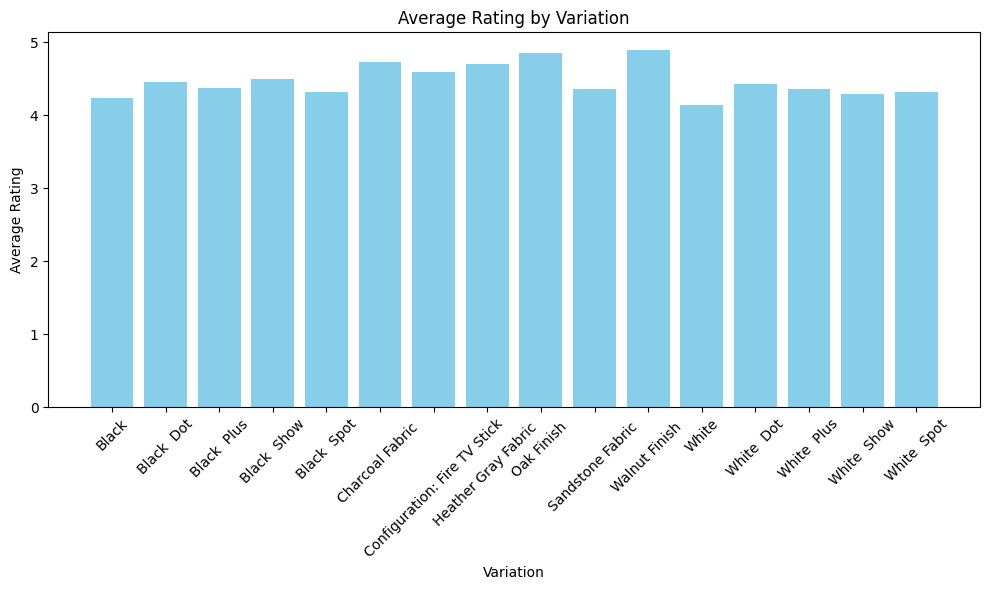

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the TSV file
data = pd.read_csv("/content/amazon_alexa.tsv", sep="\t")

# Check if required columns exist
if all(col in data.columns for col in ['variation', 'rating']):

  # Group by variation and calculate average rating
  data_grouped = data.groupby('variation')['rating'].mean()
  data_grouped = data_grouped.reset_index()  # Convert to DataFrame for plotting

  # Create grouped bar chart
  plt.figure(figsize=(10, 6))  # Adjust figure size
  plt.bar(data_grouped['variation'], data_grouped['rating'], color='skyblue')

  # Customize plot elements
  plt.title('Average Rating by Variation')
  plt.xlabel('Variation')
  plt.ylabel('Average Rating')
  plt.xticks(rotation=45)  # Rotate x-axis labels for readability
  plt.tight_layout()  # Adjust spacing for better readability

  plt.show()

else:
  print("Required columns 'variation' and 'rating' not found in the dataset.")


In [ ]:
data_length = len(data)

print(f"The data contains {data_length} rows.")

The data contains 3150 rows.


In [ ]:
import pandas as pd

# Read the data from the TSV file
data = pd.read_csv("/content/amazon_alexa.tsv", sep="\t")

# Check if 'variation' column exists
if 'variation' in data.columns:

  # Get the total number of data points
  total_data_points = len(data)

  # Calculate the number of data points for each variation
  variation_counts = data['variation'].value_counts()

  # Calculate the percentage distribution for each variation
  percentage_distribution = (variation_counts / total_data_points) * 100

  # Print the results
  print("Percentage Distribution of Variations:")
  for variation, percentage in percentage_distribution.items():
    print(f"{variation}: {percentage:.2f}%")

else:
  print("'variation' column not found in the dataset.")


Percentage Distribution of Variations:
Black  Dot: 16.38%
Charcoal Fabric : 13.65%
Configuration: Fire TV Stick: 11.11%
Black  Plus: 8.57%
Black  Show: 8.41%
Black: 8.29%
Black  Spot: 7.65%
White  Dot: 5.84%
Heather Gray Fabric : 4.98%
White  Spot: 3.46%
White: 2.89%
Sandstone Fabric : 2.86%
White  Show: 2.70%
White  Plus: 2.48%
Oak Finish : 0.44%
Walnut Finish : 0.29%


In [ ]:
import pandas as pd

# Read the data from the TSV file
data = pd.read_csv("/content/amazon_alexa.tsv", sep="\t") # Read the data into a DataFrame named 'data'

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.84
0     8.16
Name: count, dtype: float64


In [ ]:
print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [ ]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

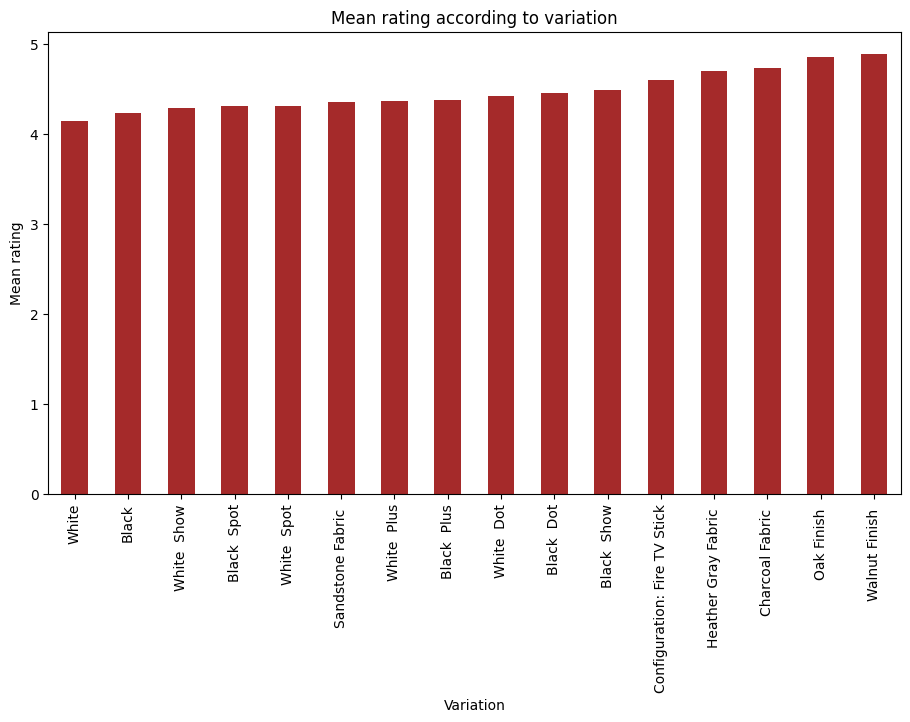

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # Import the matplotlib library

data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [ ]:
# Check the column names in your DataFrame
print(data.columns)

# If 'length' is misspelled, correct it.
# If it's not present, you might need to calculate it based on other columns or revisit your data source.
# For example, if you have a column with text, you can calculate its length:
data['length'] = data['verified_reviews'].str.len()

data['length'].describe()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution')]

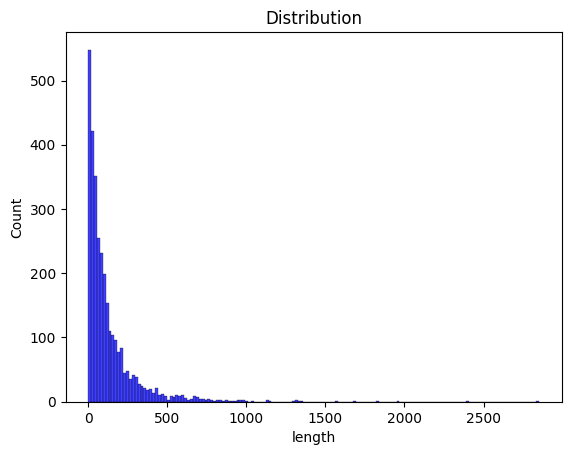

In [ ]:
import seaborn as sns # Import the seaborn library and alias it as 'sns'

sns.histplot(data['length'],color='blue').set(title='Distribution')

[Text(0.5, 1.0, 'Distribution')]

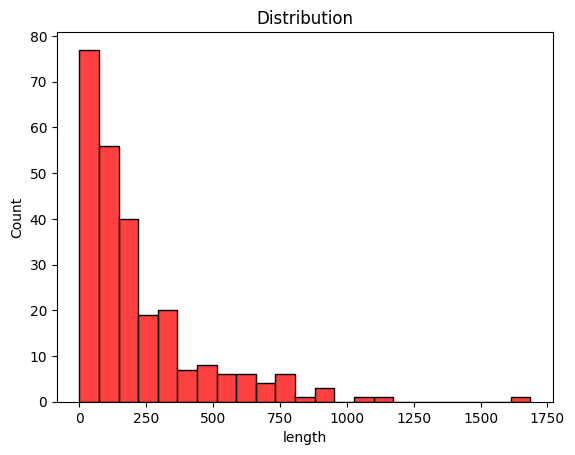

In [ ]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution')

[Text(0.5, 1.0, 'Distribution')]

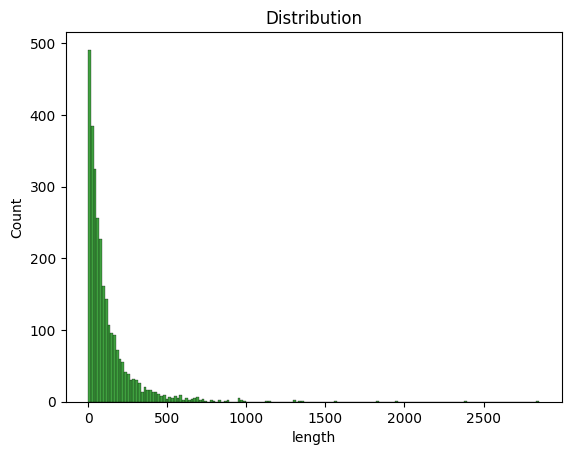

In [ ]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution')

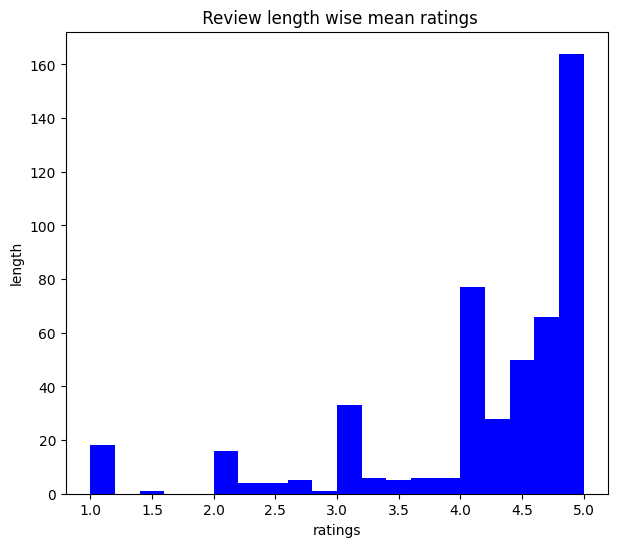

In [ ]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # Import the CountVectorizer class

# Handle missing values by filling them with an empty string
data['verified_reviews'].fillna('', inplace=True)

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

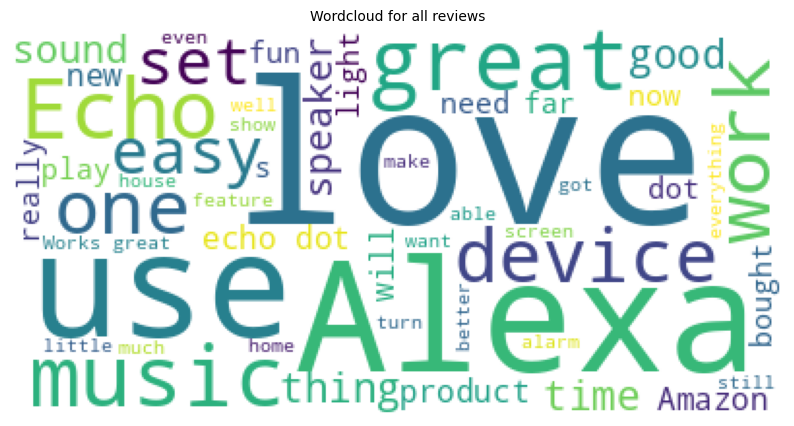

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud # Import the WordCloud class

reviews = " ".join(review for review in data['verified_reviews'])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
import nltk # Import nltk library
from nltk.stem import PorterStemmer # Import PorterStemmer
nltk.download('punkt') # Download required resources
nltk.download('stopwords') # Download the stopwords corpus
from nltk.corpus import stopwords # Import stopwords
import re # Import the 're' module for regular expressions

corpus = []
stemmer = PorterStemmer()
STOPWORDS = set(stopwords.words('english')) # Define STOPWORDS
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [ ]:
import pickle
import os

# Create the 'Models' directory if it doesn't exist
if not os.path.exists('Models'):
    os.makedirs('Models')

pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb')) # Save the CountVectorizer model

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3150, 2500)
y shape: (3150,)


In [ ]:
import nltk # Import nltk library
from nltk.stem import PorterStemmer # Import PorterStemmer
nltk.download('punkt') # Download required resources
nltk.download('stopwords') # Download the stopwords corpus
from nltk.corpus import stopwords # Import stopwords
import re # Import the 're' module for regular expressions
from sklearn.model_selection import train_test_split # Import train_test_split

corpus = []
stemmer = PorterStemmer()
STOPWORDS = set(stopwords.words('english')) # Define STOPWORDS
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

# ... rest of your code ...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


X train: (2205, 2500)
y train: (2205,)
X test: (945, 2500)
y test: (945,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


In [ ]:
from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler

scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
# Saving the scaler model
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [ ]:
# Fitting scaled X_train and y_train on Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier # Import the RandomForestClassifier class

model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
# Accuracy of the model on training and testing data
print("Training Accuracy :", model_rf.score(X_train_scl, y_train) * 100)
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test) * 100)

Training Accuracy : 99.41043083900227
Testing Accuracy : 94.07407407407408


In [ ]:
# Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function
cm = confusion_matrix(y_test, y_preds)

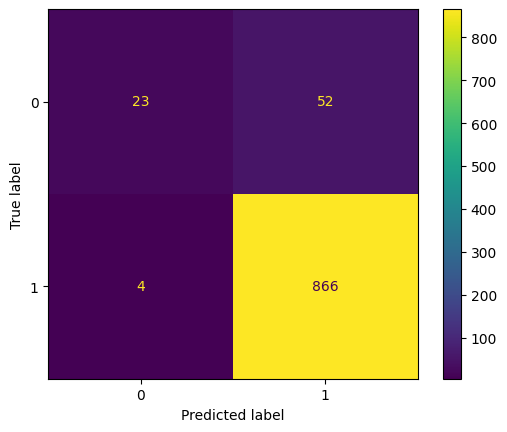

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score # Import cross_val_score

accuracies = cross_val_score(estimator=model_rf, X=X_train_scl, y=y_train, cv=10)

In [ ]:
print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9337947346770876
Standard Variance : 0.01089454987388002


In [ ]:
params = {
    'bootstrap': [True],
'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [ ]:
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [ ]:
# Getting the best parameters from the grid search
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [ ]:
from sklearn.metrics import accuracy_score # Import accuracy_score

print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean() * 100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean() * 100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds)) # Now accuracy_score is defined

Cross validation mean accuracy on train set : 96.97863996557811
Cross validation mean accuracy on test set : 92.28446836132443
Accuracy score for test set : 0.9407407407407408


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier # Import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Accuracy of the model on training and testing data
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9700680272108844
Testing Accuracy : 0.9407407407407408


In [ ]:
y_preds = model_xgb.predict(X_test)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 25  50]
 [ 10 860]]


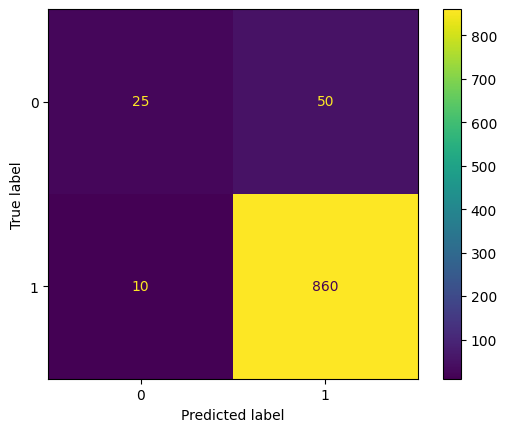

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
# Saving the XGBoost classifier
import pickle
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [ ]:
#Accuracy of the model on training and testing data
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.91005291005291


In [ ]:
y_preds = model_dt.predict(X_test)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 33  42]
 [ 48 822]]


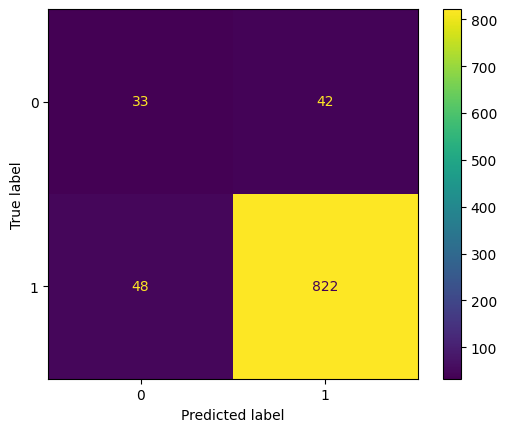

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [ ]:
!pip install flask pyngrok

In [ ]:
!ngrok authtoken <YOUR_AUTHTOKEN>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `ngrok authtoken <YOUR_AUTHTOKEN>'


In [ ]:
# Import necessary libraries
from IPython.display import display, HTML, Javascript

# Define the HTML content for the webpage
html_content = """
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Text Sentiment Predictor</title>
</head>

<body>
    <h1>Text Sentiment Prediction</h1>

    <form id="predictionForm">
        <input type="file" id="csvFileInput" accept=".csv">
        <textarea id="textInput" placeholder="Enter text..."></textarea>
        <button type="button" onclick="predict()">Predict</button>
        <button id="downloadBtn" style="display:none" onclick="downloadPredictions()">Download Predictions</button>
    </form>

    <div id="predictionResult"></div>
    <div id="graphContainer"></div>

    <script>
        function predict() {
            // Check if CSV file is present
            var csvFileInput = document.getElementById("csvFileInput");
            var textInput = document.getElementById("textInput");
            var predictionResult = document.getElementById("predictionResult");
            var graphContainer = document.getElementById("graphContainer");

            if (csvFileInput.files.length > 0) {
                // Upload CSV file
                var formData = new FormData();
                formData.append("file", csvFileInput.files[0]);

                fetch("http://localhost:5000/predict", {
                    method: "POST",
                    body: formData
                })
                    .then(response => {
                        if (response.headers.get('X-Graph-Exists') === 'true') {
                            console.log("Graph")
                            var graphData = response.headers.get('X-Graph-Data');
                            displayGraph(graphData);
                        }

                        return response.blob();
                    })
                    .then(blob => {
                        console.log("Blob:", blob);

                        document.getElementById("downloadBtn").style.display = "block";
                        document.getElementById("downloadBtn").onclick = function () {
                            console.log("Downloading...");
                            var url = URL.createObjectURL(blob);
                            console.log("URL:", url);

                            var a = document.createElement("a");
                            a.href = url;
                            a.download = "Predictions.csv";
                            document.body.appendChild(a);
                            a.click();
                            document.body.removeChild(a);
                        };
                    })
                    .catch(error => {
                        console.error("Error:", error);
                    });

            } else if (textInput.value.trim() !== "") {
                // Predict on single sentence
                fetch("http://localhost:5000/predict", {
                    method: "POST",
                    headers: {
                        "Content-Type": "application/json"
                    },
                    body: JSON.stringify({ "text": textInput.value.trim() })
                })
                    .then(response => response.json())
                    .then(data => {
                        console.log(data)
                        predictionResult.innerHTML = "Predicted sentiment: " + data.prediction;
                    });
            }
        }

        function downloadPredictions() {
            console.log("Download prediction")
        }

        function displayGraph(graphData) {
            var graphUrl = "data:image/png;base64," + graphData;
            var img = document.createElement('img');
            img.src = graphUrl;
            graphContainer.appendChild(img);
        }
    </script>

</body>

</html>
 238 changes: 238 additions & 0 deletions238
templates/landing.html
Original file line number	Diff line number	Diff line change
@@ -0,0 +1,238 @@
<!DOCTYPE html>
<html>

<head>
  <meta charset="utf-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1" />
  <meta name="theme-color" content="#000000" />
  <link rel="shortcut icon" href="./assets/img/favicon.ico" />
  <link rel="apple-touch-icon" sizes="76x76" href="./assets/img/apple-icon.png" />
  <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css" />
  <link rel="stylesheet"
    href="https://cdn.jsdelivr.net/gh/creativetimofficial/tailwind-starter-kit/compiled-tailwind.min.css" />
  <title>Amazon Alexa Reviews Analysis</title>
</head>

<body class="text-gray-800 antialiased">
  <script src="https://cdn.jsdelivr.net/gh/alpinejs/alpine@v2.x.x/dist/alpine.js" defer></script>

  <main>
    <div class="relative pt-16 pb-32 flex content-center items-center justify-center" style="min-height: 75vh;">
      <div class="absolute top-0 w-full h-full bg-center bg-cover"
        style='background-image: linear-gradient(90deg, rgba(17,223,169,1) 0%, rgba(3,60,88,1) 49%, rgba(10,32,50,1) 100%);'>
        <span id="blackOverlay" class="w-full h-full absolute opacity-50 bg-black"></span>
      </div>
      <div class="container relative mx-auto">
        <div class="items-center flex flex-wrap">
          <div class="w-full lg:w-6/12 px-4 ml-auto mr-auto text-center">
            <div class="pr-12">
              <h1 class="text-white font-semibold text-5xl">
                Understand the emotions behind the words.😊
              </h1>
              <p class="mt-4 text-lg text-gray-300">
                Text sentiment prediction is a powerful tool that can help you to understand the emotions and opinions
                expressed in your text data.
                This information can be used to improve your business in a number of ways
              </p>
            </div>
          </div>
        </div>
      </div>
      <div class="top-auto bottom-0 left-0 right-0 w-full absolute pointer-events-none overflow-hidden"
        style="height: 70px;">
        <svg class="absolute bottom-0 overflow-hidden" xmlns="http://www.w3.org/2000/svg" preserveAspectRatio="none"
          version="1.1" viewBox="0 0 2560 100" x="0" y="0">
          <polygon class="text-gray-300 fill-current" points="2560 0 2560 100 0 100"></polygon>
        </svg>
      </div>
    </div>

    <section class="relative py-20">
      <div class="bottom-auto top-0 left-0 right-0 w-full absolute pointer-events-none overflow-hidden -mt-20"
        style="height: 80px;">
        <svg class="absolute bottom-0 overflow-hidden" xmlns="http://www.w3.org/2000/svg" preserveAspectRatio="none"
          version="1.1" viewBox="0 0 2560 100" x="0" y="0">
          <polygon class="text-white fill-current" points="2560 0 2560 100 0 100"></polygon>
        </svg>
      </div>
      <div class="flex flex-col items-center justify-center">
        <h1 class="text-5xl font-semibold  py-2 ">Text Sentiment Prediction</h1>
      </div>
      <div class="container mx-auto px-4 py-24">

        <div class="items-center flex flex-wrap">
          <div class="w-full md:w-4/12 ml-auto mr-auto px-4">
            <form id="predictionForm">




              <div class="container max-w-full mx-auto md:py-24 px-6">
                <div class="max-w-sm mx-auto px-6">
                  <div class="relative flex flex-wrap">
                    <div class="w-full relative">
                      <div class="md:mt-6">
                        <form class="mt-8" id="predictionForm">
                          <div class="mx-auto max-w-lg ">
                            <div class="py-1">
                              <span class="px-1 text-sm text-gray-600">Upload your CSV file</span>
                              <input placeholder="" type="file" id="csvFileInput" accept=".csv"
                                class="text-md block px-3 py-2 rounded-lg w-full
                                   bg-white border-2 border-gray-300 placeholder-gray-600 shadow-md focus:placeholder-gray-500 focus:bg-white focus:border-gray-600 focus:outline-none">
                            </div>

                            <div class="py-1">
                              <span class="px-1 text-sm text-gray-600">Text for Prediction</span>
                              <textarea
                                class="text-md block px-3 py-2 rounded-lg w-full
                                bg-white border-2 border-gray-300 placeholder-gray-600 shadow-md focus:placeholder-gray-500 focus:bg-white focus:border-gray-600 focus:outline-none"
                                id="textInput" placeholder="Enter text..."></textarea>

                            </div>

                            <button type="button" onclick="predict()" class="mt-3 text-lg font-semibold
                                                            bg-gray-800 w-full text-white rounded-lg
                                                     px-6 py-3 block shadow-xl hover:text-white hover:bg-black">
                              Predict
                            </button>

                          </div>
                        </form>



                      </div>
                    </div>
                  </div>
                </div>
              </div>
            </form>
          </div>
          <div class="w-full md:w-4/12 ml-auto mr-auto px-4">
            <div>
              <h1 class="text-4xl underline underline-offset-8  ">Prediction Result</h1>
              <div class="p-4 m-2 border">
                <div id="predictionResult"></div>

              </div>
            </div>
            <div class="pt-6">
              <h1 class="text-4xl underline underline-offset-8  ">graph Result</h1>
              <div class="p-4 m-2 border  ">
                <div id="graphContainer"></div>
              </div>
            </div>
            <button id="downloadBtn" style="display:none" onclick="downloadPredictions()" class="mt-3 text-lg font-semibold
            bg-gray-800 w-full text-white rounded-lg
     px-6 py-3 mt-10 block shadow-xl hover:text-white hover:bg-black">
              Download Predictions
            </button>
          </div>

        </div>
      </div>
    </section>



  </main>
  <footer class="relative bg-gray-900 pt-8 pb-6">
    <div class="bottom-auto top-0 left-0 right-0 w-full absolute pointer-events-none overflow-hidden -mt-20"
      style="height: 80px;">
      <svg class="absolute bottom-0 overflow-hidden" xmlns="http://www.w3.org/2000/svg" preserveAspectRatio="none"
        version="1.1" viewBox="0 0 2560 100" x="0" y="0">
        <polygon class="text-gray-300 fill-current" points="2560 0 2560 100 0 100"></polygon>
      </svg>
    </div>
    <div class="container mx-auto px-4">

      <hr class="my-6 border-gray-400" />
      <div class="flex flex-wrap items-center md:justify-between justify-center">
        <div class="w-full md:w-4/12 px-4 mx-auto text-center">
          <div class="text-sm text-white font-semibold py-1">
            Copyright © Text sentiment prediction

          </div>
        </div>
      </div>
    </div>
  </footer>
</body>
<script>
  function predict() {
    // Check if CSV file is present
    var csvFileInput = document.getElementById("csvFileInput");
    var textInput = document.getElementById("textInput");
    var predictionResult = document.getElementById("predictionResult");
    var graphContainer = document.getElementById("graphContainer");

    if (csvFileInput.files.length > 0) {
      // Upload CSV file
      var formData = new FormData();
      formData.append("file", csvFileInput.files[0]);

      fetch("http://localhost:5000/predict", {
        method: "POST",
        body: formData
      })
        .then(response => {
          if (response.headers.get('X-Graph-Exists') === 'true') {
            console.log("Graph")
            var graphData = response.headers.get('X-Graph-Data');
            displayGraph(graphData);
          }

          return response.blob();
        })
        .then(blob => {
          console.log("Blob:", blob);

          document.getElementById("downloadBtn").style.display = "block";
          document.getElementById("downloadBtn").onclick = function () {
            console.log("Downloading...");
            var url = URL.createObjectURL(blob);
            console.log("URL:", url);

            var a = document.createElement("a");
            a.href = url;
            a.download = "Predictions.csv";
            document.body.appendChild(a);
            a.click();
            document.body.removeChild(a);
          };
        })
        .catch(error => {
          console.error("Error:", error);
        });

    } else if (textInput.value.trim() !== "") {
      // Predict on single sentence
      fetch("http://localhost:5000/predict", {
        method: "POST",
        headers: {
          "Content-Type": "application/json"
        },
        body: JSON.stringify({ "text": textInput.value.trim() })
      })
        .then(response => response.json())
        .then(data => {
          console.log(data)
          predictionResult.innerHTML = "Predicted sentiment: " + data.prediction;
        });
    }
  }

  function downloadPredictions() {
    console.log("Download prediction")
  }

  function displayGraph(graphData) {
    predictionResult.innerHTML = "";
    var graphUrl = "data:image/png;base64," + graphData;
    var img = document.createElement('img');
    img.src = graphUrl;
    graphContainer.appendChild(img);
  }
</script>

</html>
"""

# Display the HTML content in the notebook
display(HTML(html_content))


In [ ]:
from IPython.display import display, HTML

# Define the HTML content for the webpage
html_content = """
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Text Sentiment Predictor</title>
</head>

<body>
    <h1>Text Sentiment Predictor</h1>
    </body>

</html>
"""

# Display the HTML content
display(HTML(html_content))